1. Write code that implements LU decomposition. (You may use Lemma 3.7 in textbook to
check whether a permutation matrix $P$ is needed.) Use it to solve the linear
system $A\boldsymbol{x} = \boldsymbol{b}$ where:
$$A=
\begin{bmatrix} 0.4218 & 0.6557 & 0.6787 & 0.6555 \\ 0.9157 & 0.0357 & 0.7577 &
0.1712 \\ 0.7922 & 0.8491 & 0.7431 & 0.7060 \\ 0.9595 & 0.9340 & 0.3922 & 0.0318
\end{bmatrix} \text{ and } \boldsymbol{b} = \begin{bmatrix} 0.2769 \\ 0.0462 \\ 0.0971 \\
0.8235 \end{bmatrix}.
$$
Include your code as part of your solution.
(You cannot solve the equation directly. You must obtain the LU decomposition
first.)
Then, solve the linear system $A\boldsymbol{x} = \boldsymbol{b}'$ as efficiently as possible, where $A$
is as above and
$$
\boldsymbol{b}' =
\begin{bmatrix}
4.3790 \\
1.8519 \\
5.7808 \\
6.0217
\end{bmatrix}.
$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [4]:
def perm(n, i, j):
    p = np.eye(n)
    tmp = p[i].copy()
    p[i] = p[j]
    p[j] = tmp
    return p

In [5]:
def PLU(A):
    assert A.shape[0] == A.shape[1]
    n = len(A)
    P = np.eye(n)
    L = np.eye(n)
    U = A
    i = 0
    while i < n-1:
        # Swap so largest pivot is on the diagonal
        new_index = i
        for j in range(i+1, n):
            if U[j,i] > U[new_index,i]:
                new_index = j
        p = perm(n, i, new_index)
        P = p@P
        if i > 0:
            for k in range(0, i):
                tmp = L[i,k]
                L[i,k] = L[new_index,k]
                L[new_index,k] = tmp
        U = p@U
            
        for j in range(i+1, n): #Regular LU code
            m_ji = U[j,i]/U[i,i]
            for k in range(i, n):
                U[j,k] = U[j,k] - m_ji*U[i,k]
            L[j,i] = m_ji
        i += 1
    return (P, L, U)
            

In [6]:
A = np.array([[0.4218, 0.6557, 0.6787, 0.6555],
              [0.9157, 0.0357, 0.7577, 0.1712],
              [0.7922, 0.8491, 0.7431, 0.7060],
              [0.9595, 0.9340, 0.3922, 0.0318]])

b = np.array([0.2769, 0.0462, 0.0971, 0.8235])

In [7]:
P, L, U = PLU(A)
print(P)
print(L)
print(U)

[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
[[ 1.          0.          0.          0.        ]
 [ 0.43960396  1.          0.          0.        ]
 [ 0.95435122 -3.49094035  1.          0.        ]
 [ 0.82563835  0.31803602  0.12007827  1.        ]]
[[0.9595     0.934      0.3922     0.0318    ]
 [0.         0.2451099  0.50628733 0.64152059]
 [0.         0.         2.15082231 2.38036176]
 [0.         0.         0.         0.18988831]]


In [8]:
def solvePLU(A, b):
    P, L, U = PLU(A)
    y = scipy.linalg.solve_triangular(L, P@b, lower=True)
    return scipy.linalg.solve_triangular(U, y, lower=False)

In [9]:
# Solve the first system
x = solvePLU(A, b)
print(x)
# Check correctness
print((np.abs(A@x - b) < 1e-15).all())

[-1.26040472  1.40084283  2.03133593 -2.27103223]
True


In [10]:
# Solve the second system
b_prime = np.array([4.3790, 1.8519, 5.7808, 6.0217])
x_prime = solvePLU(A, b_prime)
print(x_prime)
# Check correctness
print((np.abs(A@x_prime - b_prime) < 1e-15).all())

[1.00000000e+00 5.00000000e+00 1.00000000e+00 4.67737279e-15]
True


Then, the solution to $A\boldsymbol{x}=\boldsymbol{b}$ is
$$
x = \begin{bmatrix}
-1.26040472\\1.40084283\\2.03133593\\-2.27103223
\end{bmatrix}
$$
and the solution to $A\boldsymbol{x}'=\boldsymbol{b}'$ is
$$
x' = \begin{bmatrix}
1\\5\\1\\0
\end{bmatrix}
$$

2. Let $\mathcal{P}_{n}$ denote the vector space of all polynomials of degree $n$ or
less. Show that the derivative operator, $\frac{d}{dx}$, is a well-defined linear
operator from $\mathcal{P}_{n}$ to itself. Compute a matrix representation for this
operator in the basis given by monomials (${i.e.}$ $\{1,x,x^{2},\ldots, x^{n}\}
$). What are the eigenvalues of this operator?

Let $\mathcal{B} = \{1, x, x^2,...,x^n\}$ be the standard basis for $\mathcal{P}_n$. Then,
$$
\begin{align}
\frac{d}{dx}(1) &= 0\\
\frac{d}{dx}(x) &= 1\\
\frac{d}{dx}(x^2) &= 2x\\
&...\\
\frac{d}{dx}(x^n) &= nx^{n-1}
\end{align}
$$
Then,
$$
\begin{align}
\left[\frac{d}{dx}\right]_\mathcal{B}^\mathcal{B} = 
\begin{bmatrix}
0 & 1 & 0 & \cdots & 0\\
0 & 0 & 2 & \cdots & 0\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
0 & 0 & 0 & \cdots & n
\end{bmatrix}
\end{align}
$$
Since $\left[\frac{d}{dx}\right]_\mathcal{B}^\mathcal{B}$ is upper triangular, its eigenvalues are on the diagonal. Since every diagonal element is 0, the only unique eigenvalue of $\frac{d}{dx}$ is 0.

3. Some facts about special matrixes  
a. Suppose that $D$ is a diagonal $n\times n$ matrix.
Show that $||D||_{\infty} = \max_{1 \le i \le n} |D_{ii}| $.  
b. Let $U$ be a unitary matrix $n\times n$ matrix (this means that $U^{-1}$ equals the
conjugate transpose $U^{\ast}$). Show $||U||_2=1$.  
c. Let $A$ be a Hermitian matrix (so that $A = A^{\ast}$). Prove that $A$ is
unitarily equivalent to a diagonal matrix.

a. 
$$
\begin{align}
\max_{1 \le i \le n} |D_{ii}| &= \frac{\max_{1 \le i \le n} |D_{ii}|}{||\begin{bmatrix}1 & \cdots & 1\end{bmatrix}^T||_\infty}\\
&= \frac{||\begin{bmatrix}D_{11} & \cdots & D_{nn}\end{bmatrix}^T||_\infty}{||\begin{bmatrix}1 & \cdots & 1\end{bmatrix}^T||_\infty}\\
&= \frac{||D\begin{bmatrix}1 & \cdots & 1\end{bmatrix}^T||_\infty}{||\begin{bmatrix}1 & \cdots & 1\end{bmatrix}^T||_\infty}\\
&\le \sup_{v\in V, v\neq0} \frac{||Dv||_\infty}{||v||_\infty} = ||D||_\infty
\end{align}
$$
However, for any $v\in V, v\neq 0$,
$$
\begin{align}
\frac{||Dv||_\infty}{||v||_\infty} &= \frac{\max_{1\leq i\leq n} |D_{ii} v_i|}{\max_{1\leq i\leq n} |v_i|}\\
\end{align}
$$
Then for some $q\in\mathbb{N}, 1\leq q \leq n$,
$$
\begin{align}
\frac{||Dv||_\infty}{||v||_\infty} &= \frac{|D_{qq} v_q|}{\max_{1\leq i\leq n} |v_i|}\\
&= |D_{qq}|\frac{|v_q|}{\max_{1\leq i\leq n} |v_i|}\\
&\leq \max_{1\leq i\leq n} |D_{ii}| \cdot 1\\
&\leq \max_{1\leq i\leq n} |D_{ii}|
\end{align}
$$
Then
$$
\begin{align}
||D||_\infty = \sup_{v\in V,v\neq0} \frac{||Dv||_\infty}{||v||_\infty} \leq\max_{1 \le i \le n} |D_{ii}|
\end{align}
$$
Then $\max_{1 \le i \le n} |D_{ii}| = ||D||_\infty$.  
b.
$$
\begin{align}
||U||_2 &= \sup_{v\in\infty, v\neq0} \frac{||Uv||_2}{||v||_2}\\
&= \sup_{v\in\infty,v\neq0} \frac{\sqrt{\left<Uv, Uv\right>}}{\sqrt{\left<v,v\right>}}\\
&= \sup_{v\in\infty,v\neq0} \frac{\sqrt{\left<v, U^\ast Uv\right>}}{\sqrt{\left<v,v\right>}}\\
&= \sup_{v\in\infty,v\neq0} \frac{\sqrt{\left<v, v\right>}}{\sqrt{\left<v,v\right>}} = 1
\end{align}
$$  
c. Let $A = A^\ast$. If $A \in \mathbb{C}^{n \times n}$, the characteristic polynomial of A splits  by the fundamental theorem of algebra, so we can use Schur Decomposition. If $A \in \mathbb{R}^{n \times n}$, its characteristic polynomial may not split. We wish to prove that it does, and in the reals. Expand the field of scalars available to us to include the complex numbers. Then $A$'s characteristic polynomial splits, but over the complex numbers. Let $v, \lambda$ be an eigenvector-eigenvalue pair for $A$, where $\lambda \in \mathbb{C}$. Then
$Av = \lambda v$, so
$$
\begin{align}
Av - \lambda v &= 0\\
(A-\lambda I)v &= 0\\
\end{align}
$$
It is useful to prove that $A-\lambda I$ commutes with its adjoint. By the self adjointedness of A,
$$
\begin{align}
(A-\lambda I)(A-\lambda I)* &= (A-\lambda I)(A-\lambda I)^\ast\\
&= (A-\lambda I)(A^\ast-\bar{\lambda} I)\\
&= AA^\ast - A\bar{\lambda}I - \lambda I A^\ast + \lambda I \bar{\lambda} I\\
&= A^\ast A - \bar{\lambda}IA - A^\ast\lambda I + \bar{\lambda} I \lambda I\\
&= (A^\ast-\bar{\lambda} I)(A-\lambda I)\\
&= (A-\lambda I)^\ast(A-\lambda I)
\end{align}
$$
Then
$$
\begin{align}
0 &= ||(A-\lambda I)v||\\
&=\sqrt{|<(A-\lambda I)v,(A-\lambda I)v>|}\\
&=\sqrt{|<v,(A-\lambda I)^\ast(A-\lambda I)v>|}\\
&=\sqrt{|<v,(A-\lambda I)(A-\lambda I)^\ast v>|}0\\
&=\sqrt{|<(A-\lambda I)^\ast v,(A-\lambda I)^\ast v>|}\\
&=||(A-\lambda I)^\ast v||\\
&=||(A^\ast-\bar{\lambda} I) v||
\end{align}
$$
Then
$$
(A^\ast-\bar{\lambda}I)v = 0
$$
So $v$ is an eigenvector of $A^\ast$ with eigenvalue $\bar{\lambda}$. However, since $A = A^\ast$, $\lambda = \bar{\lambda}$. Then each of the complex roots of $A$'s characteristic polynomial is actually real, so $A$'s characteristic polynomial splits over the reals. Then we can use Schur's Decomposition even when $A$ is a real matrix.  
By Schur's, there exists an upper triangular matrix $T$ and a unitary $Q$ such that $T = QAQ^\ast$. Then
$$
\overline{T^T}= T^\ast = Q^{\ast \ast}A^\ast Q^\ast = QAQ^\ast = T
$$
Since $T$ is upper triangular, and it is equal to its conjugate transpose, $T$ must be diagonal. Further, $T$'s elements must all be real. Therefore, $A = Q^\ast T Q$, so A is unitarily equivalent to a diagonal matrix. 

4. Write code that implements the following algorithms for solving linear systems
iteratively: Jacobi's method, the Gauss-Seidel method and the Successive Over
Relaxation method.
a. Use all three to solve the linear system $A\boldsymbol{x}^{\star} = \boldsymbol{b}$ where $A$ and
$\boldsymbol{b}$ are given below.
$$
\begin{align}
A = \begin{bmatrix} 2.4117 & 0.6557 & 0.6787 & 0.6555 \\ 0.9157 & 1.8804 & 0.7577 &
0.1712 \\ 0.7922 & 0.8491 & 3.0905 & 0.7060 \\ 0.9595 & 0.9340 & 0.3922 & 2.3175 
\end{bmatrix} \quad \boldsymbol{b} = \begin{bmatrix} 8.3813 \\ 7.6345 \\ 14.5862 \\ 13.2743
\end{bmatrix}
\end{align}
$$
Make a plot of the $logarithm$ of the errors, $\log\left(\|\boldsymbol{x}_{k} - \boldsymbol{x}^{\
star}\|_{2}\right)$ ($you$ $may$ $use$ $the$ $fact$ $\boldsymbol{x}^{\star} = \begin{bmatrix} 1
& 2 & 3 & 4 \end{bmatrix}^{\top}$) against the number of iterations (for all three
methods).  
b. Experiment with $\omega = -1,0,1,2,3$ in the SOR method. Are there any values
for which the method doesn't converge?

In [98]:
def jacobi(A, b, iters, x0=None): # Mine
    if (x0 == None):
        x0 = np.zeros((A.shape[1]))
    x = x0
    iterations = [x0.copy()]
    D = np.diag(A)
    for i in range(1, iters):
        x += (b-A@x)/D
        iterations.append(x.copy())
    return iterations

def gauss_siedel(A, b, iters, x0=None): # Mine
    if (x0 == None):
        x0 = np.zeros((A.shape[1]))
    x = x0
    iterations = [x0.copy()]
    # x^{(k+1)} = x^{(k)} + (L + D)^{-1} r^{(k)}
    ld = np.tril(A, k=-1) + np.diag(np.diag(A))
    U = A - ld
    for i in range(1, iters):
        dx = scipy.linalg.solve_triangular(ld, b - A@x, lower=True)
        x += dx
        # dx = scipy.linalg.solve_triangular(ld, b - U@x, lower=True)
        iterations.append(x.copy())
    return iterations

def sor(A, b, iters, w, x0=None): # Mine
    if (x0 == None):
        x0 = np.zeros((A.shape[1]))
    x = x0
    if w == 0:
        return [x for i in range(0, iters)]
    iterations = [x0.copy()]
    # x^{(k+1)} = x^{(k)} + (L + D)^{-1} r^{(k)}
    ld = np.tril(A, k=-1) + (1.0/w)*np.diag(np.diag(A))
    U = A - ld
    for i in range(1, iters):
        dx = scipy.linalg.solve_triangular(ld, b - A@x, lower=True)
        x += dx
        # dx = scipy.linalg.solve_triangular(ld, b - U@x, lower=True)
        iterations.append(x.copy())
    return iterations

def err(iterations, x_star):
    return [np.log(np.linalg.norm(x - x_star)) for x in iterations]

In [99]:
A = np.array([[2.4117, 0.6557, 0.6787, 0.6555],
              [0.9157, 1.8804, 0.7577, 0.1712],
              [0.7922, 0.8491, 3.0905, 0.7060],
              [0.9595, 0.9340, 0.3922, 2.3175]])
b = np.array([8.3813, 7.6345, 14.5862, 13.2743])
x_star = np.array([1,2,3,4])

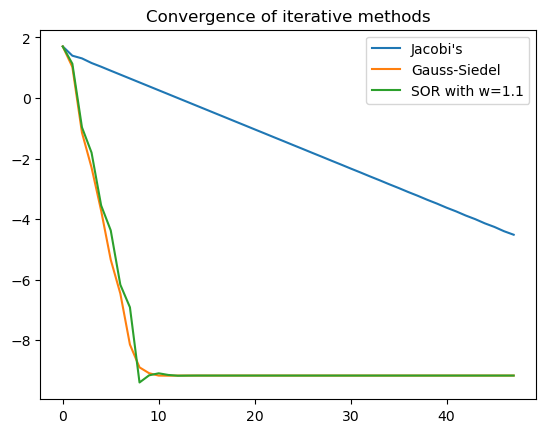

In [118]:
iters = 48
plt.title("Convergence of iterative methods")
plt.plot(np.arange(iters), err(jacobi(A, b, iters), x_star), label="Jacobi's")
plt.plot(np.arange(iters), err(gauss_siedel(A, b, iters), x_star), label="Gauss-Siedel")
# plt.plot(np.arange(iters), err(g_s(A, b, iters), x_star), label="G-S")

plt.plot(np.arange(iters), err(sor(A, b, iters, 1.1), x_star), label="SOR with w=1.1")
plt.legend()

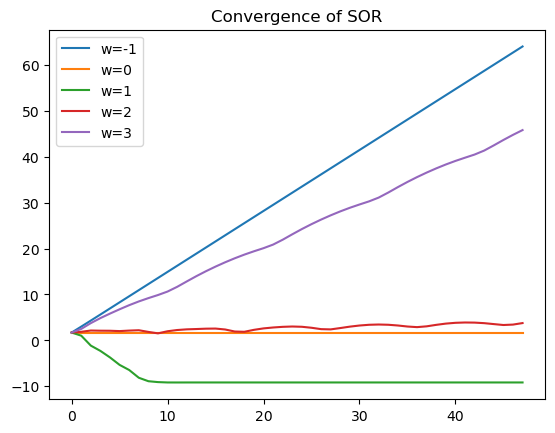

In [119]:
plt.title("Convergence of SOR")
for w in [-1,0,1,2,3]:
    plt.plot(np.arange(iters), err(sor(A, b, iters, w), x_star), label=f"w={w}")
plt.legend()

It seems that SOR does not converge for $w=-1, 0, 2$, and 3. It only converges for $w = 1\in(0,2)$, as expected by theoretical results we showed in class.